# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [2]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
class_names = [
    "apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle",
    "bowl", "boy", "bridge", "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle",
    "chair", "chimpanzee", "clock", "cloud", "cockroach", "couch", "crab", "crocodile", "cup", "dinosaur",
    "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster", "house", "kangaroo", "keyboard",
    "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man", "maple_tree", "motorcycle", "mountain",
    "mouse", "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear", "pickup_truck", "pine_tree",
    "plain", "plate", "poppy", "porcupine", "possum", "rabbit", "raccoon", "ray", "road", "rocket",
    "rose", "sea", "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake", "spider",
    "squirrel", "streetcar", "sunflower", "sweet_pepper", "table", "tank", "telephone", "television", "tiger", "tractor",
    "train", "trout", "tulip", "turtle", "wardrobe", "whale", "willow_tree", "wolf", "woman", "worm"
]

In [4]:
# Your Code Here

#Examining the shape of the dataset
print("Shape of the training set:", x_train.shape)
print("Shape of the test set:", x_test.shape)
#Examining the dimensions of the images
print("Image dimensions:", x_train.shape[1:])
#Printing the number of classes
print("Number of classes:", len(class_names))

Shape of the training set: (50000, 32, 32, 3)
Shape of the test set: (10000, 32, 32, 3)
Image dimensions: (32, 32, 3)
Number of classes: 100


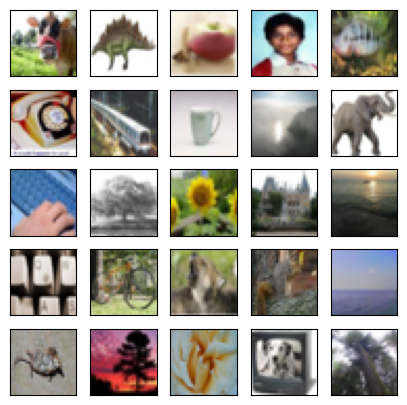

In [5]:
#25 examples from the training set
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])

### 1b: Data Preprocessing
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [6]:
# Your Code Here
#Normalizing the images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Verify normalization
print("Min pixel value (train):", x_train.min())
print("Max pixel value (train):", x_train.max())
print("Min pixel value (test):", x_test.min())
print("Max pixel value (test):", x_test.max())

Min pixel value (train): 0.0
Max pixel value (train): 1.0
Min pixel value (test): 0.0
Max pixel value (test): 1.0


In [7]:
#Labels to one-hot encoded vectors
from keras.utils import to_categorical

num_classes = len(class_names)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Verify shape
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of y_train: (50000, 100)
Shape of y_test: (10000, 100)


In [8]:
from sklearn.model_selection import train_test_split

# Splitting the training set into 80% training and 20% validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size=0.2,
                                                  random_state=42,
                                                  stratify=y_train)

# Verifying the shapes of the new datasets
print("New training set shape:", x_train.shape)
print("New validation set shape:", x_val.shape)
print("New training labels shape:", y_train.shape)
print("New validation labels shape:", y_val.shape)


New training set shape: (40000, 32, 32, 3)
New validation set shape: (10000, 32, 32, 3)
New training labels shape: (40000, 100)
New validation labels shape: (10000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [19]:
# Your Code Here
#importing the required libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define baseline CNN model
model = Sequential([
    # Convolutional Layer 1
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    # Convolutional Layer 2
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    # Convolutional Layer 3
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten before fully connected layers
    Flatten(),

    # Fully Connected Dense Layer 1
    Dense(256, activation='relu'),

    # Output Layer (100 classes, softmax activation)
    Dense(100, activation='softmax')
])

# Print model summary
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 100)                 │          25,700 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 643,492 (2.45 MB)

 Trainable params: 643,492 (2.45 MB)

 Non-trainable params: 0 (0.00 B)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different.
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> categorical cross entropy because our case is a multi-class classification problem
- <b>Optimizer:</b> Adam because is more efficient than SGD.

In [20]:
# Your Code Here
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [22]:
# Your Code Here
# Train the model
history = model.fit(x_train, y_train,
                    epochs=11,  # Start with 30 epochs, adjust if needed
                    batch_size=32,
                    validation_data=(x_val, y_val),
                    shuffle=True)

Epoch 1/11
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9443 - loss: 0.1795 - val_accuracy: 0.3488 - val_loss: 7.8207
Epoch 2/11
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9433 - loss: 0.1824 - val_accuracy: 0.3464 - val_loss: 8.1208
Epoch 3/11
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9381 - loss: 0.1919 - val_accuracy: 0.3436 - val_loss: 8.0530
Epoch 4/11
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9441 - loss: 0.1781 - val_accuracy: 0.3420 - val_loss: 8.7947
Epoch 5/11
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9416 - loss: 0.1841 - val_accuracy: 0.3427 - val_loss: 8.4129
Epoch 6/11
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9433 - loss: 0.1791 - val_accuracy: 0.3468 - val_loss: 8.7852
Epoch 7/11
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9440 - loss: 0.1813 - val_accuracy: 0.3505 - val_loss: 8.5050
Epoch 8/11
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9503 - loss: 0.1609

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> 0.33
- <b>Other metric:</b> Precision
- <b>Reason for selection:</b> Seems appropriate since it measures how many of the predicted classes are actually correct.
- <b>Value of metric:</b> 0.35
- <b>Interpretation of metric value:</b> The model has a precision of 35.5%, meaning that when it predicts a class, it is correct 35.5% of the time on average across all 100 categories.

In [23]:
# Your Code Here

from sklearn.metrics import precision_score
import numpy as np

# Evaluate accuracy on test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Convert model predictions to class labels
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute Precision
precision = precision_score(y_true_classes, y_pred_classes, average='macro')
print(f"Precision: {precision:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3323 - loss: 9.5852
Test Accuracy: 0.3338
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Precision: 0.3553


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

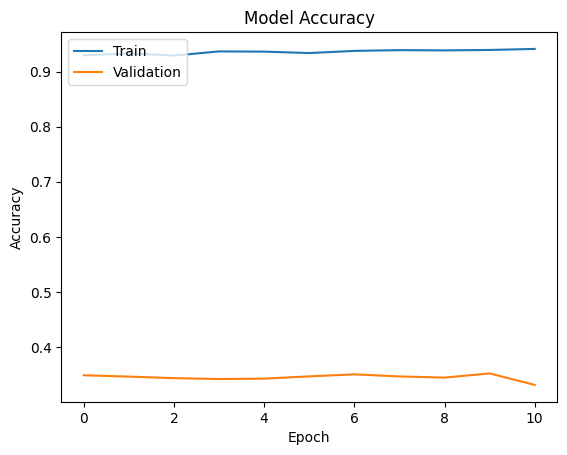

In [27]:
# Your Code Here
# Plot training & validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Observation: The model achieves high training accuracy, but validation accuracy remains low. This suggests severe overfitting.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


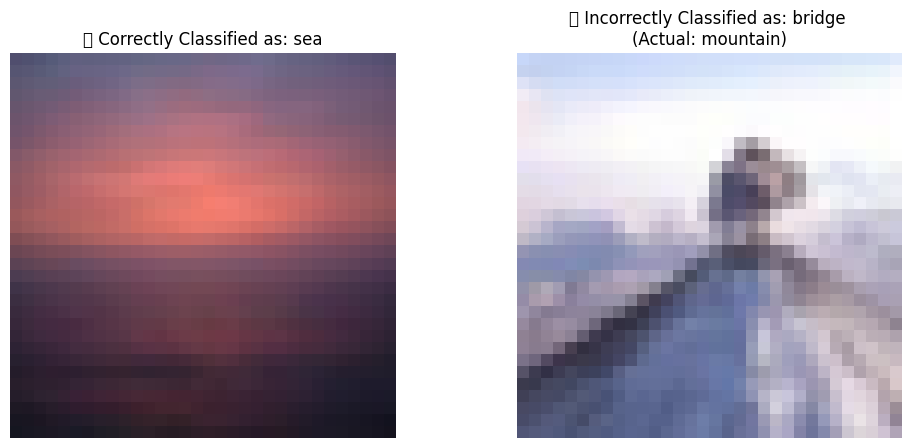

✅ Correctly Classified Image - Top 5 Probabilities:
sea: 98.22%
cloud: 1.77%
pear: 0.0%
tulip: 0.0%
mountain: 0.0%

❌ Incorrectly Classified Image - Top 5 Probabilities:
bridge: 95.17%
road: 4.78%
tank: 0.03%
pine_tree: 0.01%
mountain: 0.0%


In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Get model predictions on the test set
y_pred = model.predict(x_test)

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Find a correctly classified image
correct_idx = np.where(y_pred_classes == y_true_classes)[0][0]

# Find an incorrectly classified image
incorrect_idx = np.where(y_pred_classes != y_true_classes)[0][0]

# Plot the correctly classified image
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(x_test[correct_idx])
plt.title(f"✅ Correctly Classified as: {class_names[y_pred_classes[correct_idx]]}")
plt.axis('off')

# Plot the incorrectly classified image
plt.subplot(1, 2, 2)
plt.imshow(x_test[incorrect_idx])
plt.title(f"❌ Incorrectly Classified as: {class_names[y_pred_classes[incorrect_idx]]} \n(Actual: {class_names[y_true_classes[incorrect_idx]]})")
plt.axis('off')

plt.show()

# Display model's classification probabilities for each image
correct_probs = y_pred[correct_idx]
incorrect_probs = y_pred[incorrect_idx]

# Get the top 5 predicted classes for both images
correct_prob_dict = {class_names[i]: round(correct_probs[i] * 100, 2) for i in np.argsort(correct_probs)[-5:][::-1]}
incorrect_prob_dict = {class_names[i]: round(incorrect_probs[i] * 100, 2) for i in np.argsort(incorrect_probs)[-5:][::-1]}

print("✅ Correctly Classified Image - Top 5 Probabilities:")
for cls, prob in correct_prob_dict.items():
    print(f"{cls}: {prob}%")

print("\n❌ Incorrectly Classified Image - Top 5 Probabilities:")
for cls, prob in incorrect_prob_dict.items():
    print(f"{cls}: {prob}%")


## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [29]:
# Your Code Here
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.regularizers import l2

#Improved CNN model
model = Sequential([
    # Block 1
    Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.0005), input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.0005)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Block 2
    Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.0005)),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.0005)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Block 3
    Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.0005)),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.0005)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Global Average Pooling (Instead of Flatten)
    GlobalAveragePooling2D(),

    # Fully Connected Layers
    Dense(512, activation='relu'),
    Dropout(0.6),  # Increased Dropout to reduce overfitting
    Dense(100, activation='softmax')  # 100 classes for CIFAR-100
])

# Compile with lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003),
              loss='categorical_crossentropy',
              metrics=['accuracy'])




/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Techniques used:**
- Data augmentation: it randomly transforms images (rotations, flips, shifts) to make the model learn generalized patterns rather than memorizing specific examples. About the chosen params (rotation, width and height shift and horizontal flip):These hyperparameters enhance generalization by introducing variations in image orientation and positioning, preventing the model from overfitting to specific alignments
- L2 regularization: I chose it because the model was memorizing training data too well, leading to high training accuracy but poor validation accuracy.The 0.0005 param is because 0.0005 it is a commonly used value in deep learning that effectively limits overfitting while preserving learning capacity.


In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

datagen.fit(x_train)  # Apply to training set


### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [31]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# Train the model
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=50,
                    validation_data=(x_val, y_val),
                    callbacks=[early_stopping, lr_scheduler])


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.0561 - loss: 4.6981 - val_accuracy: 0.1597 - val_loss: 3.8781 - learning_rate: 3.0000e-04
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 0.1464 - loss: 3.9096 - val_accuracy: 0.2041 - val_loss: 3.5710 - learning_rate: 3.0000e-04
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.2076 - loss: 3.5061 - val_accuracy: 0.2471 - val_loss: 3.4111 - learning_rate: 3.0000e-04
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.2714 - loss: 3.1638 - val_accuracy: 0.3304 - val_loss: 2.9451 - learning_rate: 3.0000e-04
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.3216 - loss: 2.9342 - val_accuracy: 0.3193 - val_loss: 3.0758 - learning_rate: 3.0000e-04
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 0.3552 - loss: 2.7543 - val_accuracy: 0.4136 - val_loss: 2.5234 - learning_rate: 3.0000e-04
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 24ms/

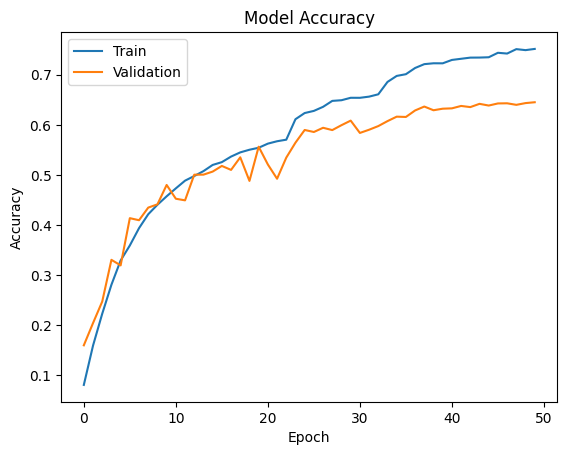

In [32]:
# Your Code Here


# Plot training & validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6412 - loss: 1.8053
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


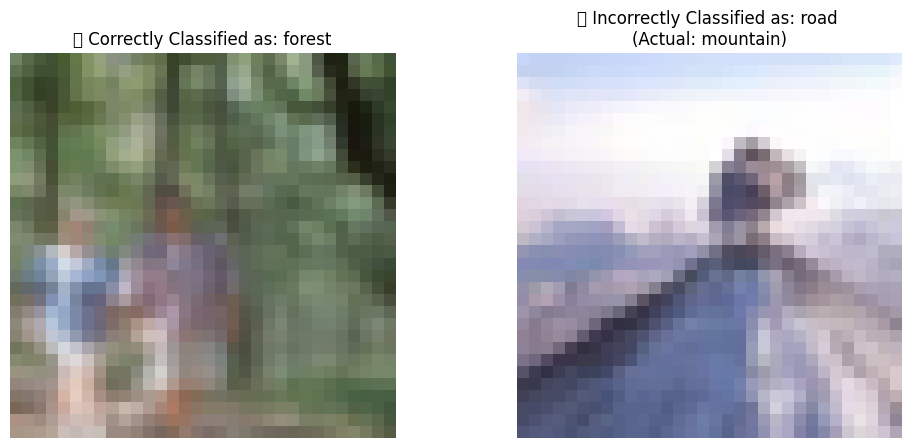

✅ **Correctly Classified Image - Top 5 Probabilities:**
forest: 71.81%
can: 8.33%
table: 7.35%
house: 4.1%
bottle: 3.36%

❌ **Incorrectly Classified Image - Top 5 Probabilities:**
road: 78.22%
bridge: 5.52%
sea: 5.28%
skyscraper: 1.86%
train: 1.43%


In [33]:
# Evaluate the improved model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Predict on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Find a correctly classified image
correct_idx = np.where(y_pred_classes == y_true_classes)[0][0]

# Find an incorrectly classified image
incorrect_idx = np.where(y_pred_classes != y_true_classes)[0][0]

# Plot the correctly classified image
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(x_test[correct_idx])
plt.title(f"✅ Correctly Classified as: {class_names[y_pred_classes[correct_idx]]}")
plt.axis('off')

# Plot the incorrectly classified image
plt.subplot(1, 2, 2)
plt.imshow(x_test[incorrect_idx])
plt.title(f"❌ Incorrectly Classified as: {class_names[y_pred_classes[incorrect_idx]]} \n(Actual: {class_names[y_true_classes[incorrect_idx]]})")
plt.axis('off')

plt.show()

# Display model's classification probabilities for each image
correct_probs = y_pred[correct_idx]
incorrect_probs = y_pred[incorrect_idx]

# Get the top 5 predicted classes for both images
correct_prob_dict = {class_names[i]: round(correct_probs[i] * 100, 2) for i in np.argsort(correct_probs)[-5:][::-1]}
incorrect_prob_dict = {class_names[i]: round(incorrect_probs[i] * 100, 2) for i in np.argsort(incorrect_probs)[-5:][::-1]}

print("✅ **Correctly Classified Image - Top 5 Probabilities:**")
for cls, prob in correct_prob_dict.items():
    print(f"{cls}: {prob}%")

print("\n❌ **Incorrectly Classified Image - Top 5 Probabilities:**")
for cls, prob in incorrect_prob_dict.items():
    print(f"{cls}: {prob}%")


### Task 4c: Discussion of the results

- Briefly discuss the results.
- Did the model's performance improve?
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

After implementing data augmentation and L2 regularization, the model's test accuracy improved from around 33% to 64.5%, and validation accuracy increased significantly, reducing overfitting. The training accuracy is now around 75%, which is closer to validation accuracy, showing better generalization.

However, early stopping did not activate because the validation loss did not stop improving consistently for the patience period. The model continued training for all 50 epochs, suggesting that loss fluctuations prevented early stopping from triggering. I would have liked to train for more epochs, as the validation metrics were still improving, but time constraints for this assignment limited further training.

There is still room for further improvement, as validation accuracy remains lower than training accuracy (~75%). Additional techniques, such as learning rate warm-up, dropout tuning, or deeper architectures, might further enhance performance.



## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.